In [40]:
import nltk
from nltk.corpus import stopwords
import string
import spacy
from sklearn.metrics import precision_recall_fscore_support
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.util import bigrams
from nltk.probability import FreqDist, ConditionalFreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tabulate import tabulate
import seaborn as sns
import re


Part A of the project starts

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [43]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [44]:
file = open("houndOfBaskervilles.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
wordslist = [i for i in wordslist if i!='']
text = ""
text = text.join(wordslist)

In [45]:
len(text)

345924

In [46]:
#Creating a string which has all the punctuations to be removed
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
cleantext = ""
#remove chapter names
chapter_pattern = r'Chapter [0-9]+.'
text = re.sub(chapter_pattern, '', text)

for char in text:
    if char not in punctuations:
        cleantext = cleantext + char

#Converting the text into lower case
cleantext = cleantext.lower()
#remove chapter names



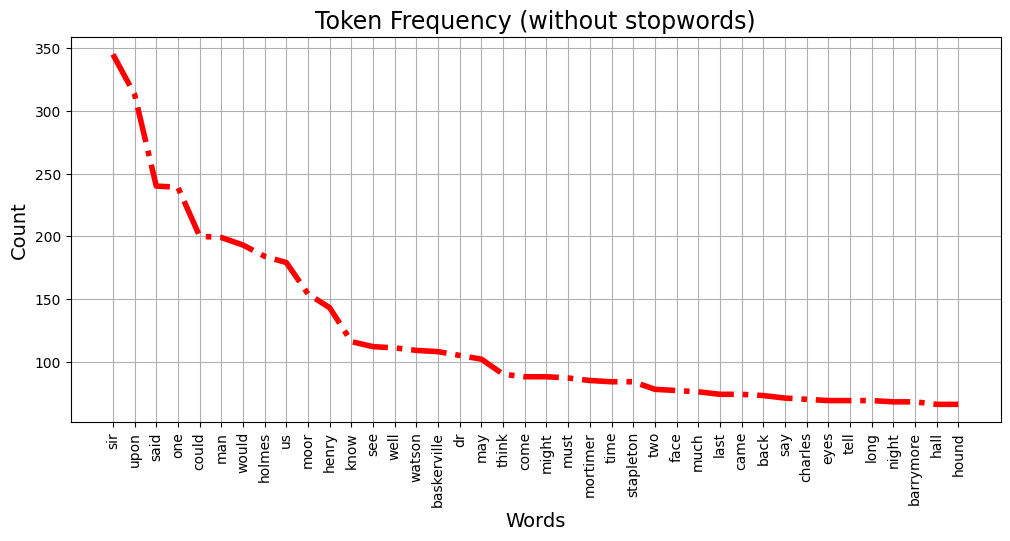

In [47]:
tokens = word_tokenize(cleantext)
stop_words = set(stopwords.words('english'))
tokens_final = [i for i in tokens if not i in stop_words] # tokenising with removing stopwords
finaltext = "  "
finaltext = finaltext.join(tokens_final)#frequency distribution without stopwaords
freq = nltk.FreqDist(tokens_final)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (without stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

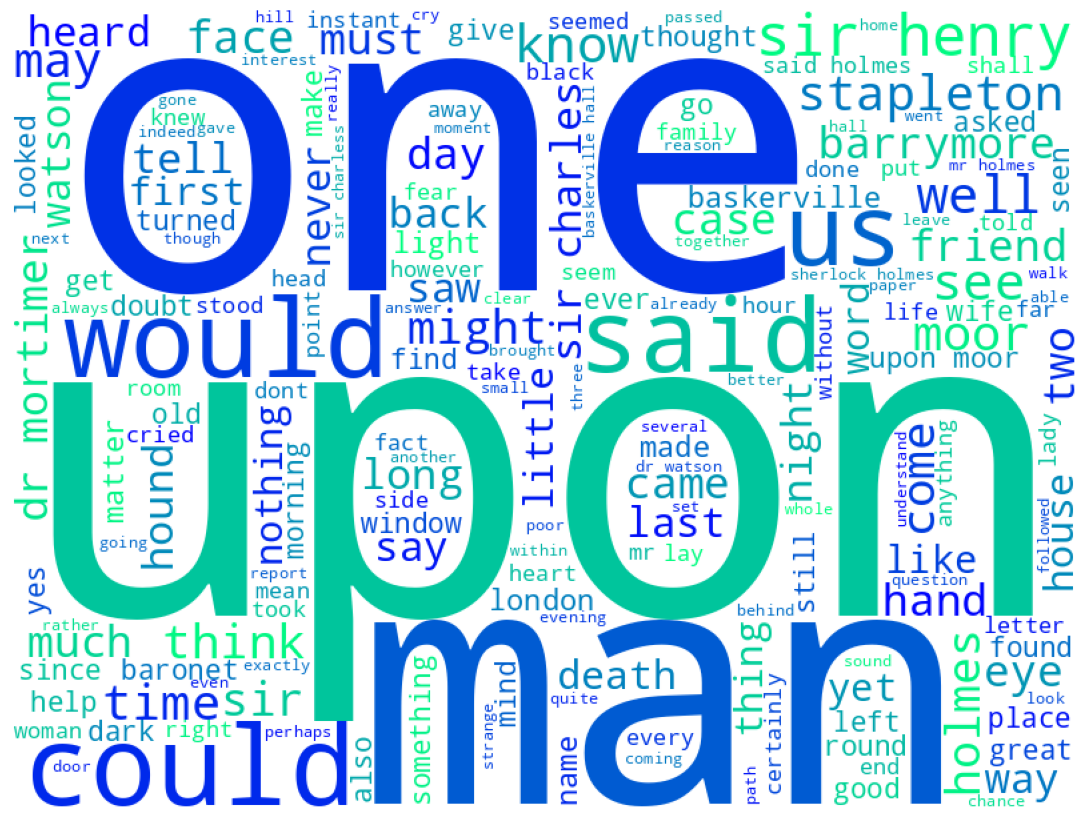

In [48]:
wordcloud = WordCloud(width = 800, height = 600,
                background_color ='white',
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext)

plt.figure(figsize = (12,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

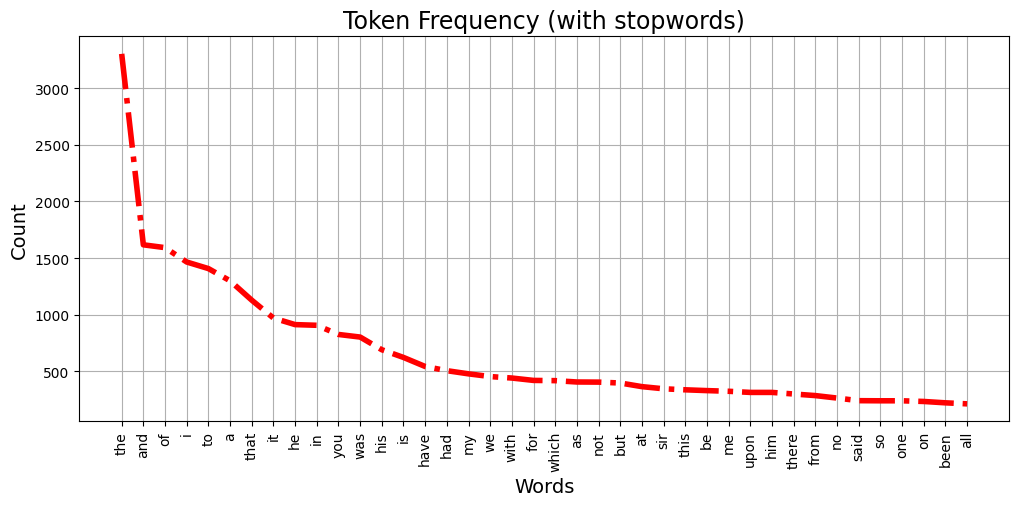

In [49]:
tokens = word_tokenize(cleantext)
freq = nltk.FreqDist(tokens)
freq = {k: v for k, v in sorted(freq.items(), key=lambda item: item[1],reverse=True)}
x = list(freq.keys())[:40]
y = list(freq.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [50]:

tagged = nltk.pos_tag(tokens)
# tagged[:15] #first 15 POS tags

In [51]:

counts = Counter( tag for word,  tag in tagged)
print(counts)

Counter({'NN': 10315, 'IN': 7681, 'DT': 6197, 'PRP': 4434, 'JJ': 4180, 'VBD': 3685, 'RB': 3355, 'VB': 2632, 'CC': 2158, 'NNS': 2131, 'PRP$': 1847, 'VBN': 1656, 'VBP': 1555, 'TO': 1407, 'VBZ': 1213, 'MD': 1165, 'VBG': 809, 'WDT': 490, 'WRB': 381, 'CD': 378, 'WP': 376, 'RP': 322, 'EX': 232, 'JJR': 148, 'PDT': 101, 'RBR': 99, 'JJS': 81, 'RBS': 45, 'WP$': 9, 'FW': 8, 'NNP': 5, 'UH': 4, 'NNPS': 1})


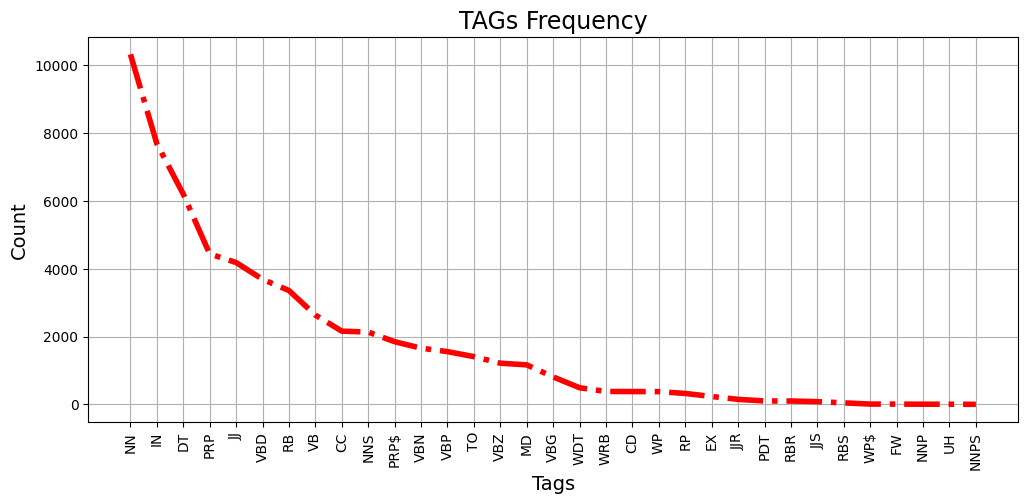

In [52]:
freq_tags = nltk.FreqDist(counts)
freq_tags = {k: v for k, v in sorted(freq_tags.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags.keys())[:40]
y = list(freq_tags.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('TAGs Frequency',size=17)
plt.xlabel('Tags',size=14)
plt.ylabel('Count',size=14)
plt.show()

In [53]:
file = open(r"Chapter 9.txt",encoding='utf-8')
wordslist = file.read().splitlines() # to escape \n occurence
wordslist = [i for i in wordslist if i!='']
text = ""
text = text.join(wordslist)

In [54]:
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
cleantext = ""

chapter_pattern = r'Chapter [0-9]+.'
text = re.sub(chapter_pattern, '', text)

for char in text:
    if char not in punctuations:
        cleantext = cleantext + char

#Converting the text into lower case
cleantext = cleantext.lower()
okens = word_tokenize(cleantext)

In [55]:
bi_grams = list(bigrams(tokens))

# Calculate frequency distributions
word_freq = FreqDist(tokens)
bi_gram_freq = ConditionalFreqDist(bi_grams)
bi_gram_freq['i']

FreqDist({'have': 146, 'had': 101, 'am': 80, 'was': 79, 'could': 74, 'should': 51, 'can': 46, 'think': 41, 'saw': 31, 'will': 28, ...})

In [56]:
from tabulate import tabulate
# Get a list of all unique words (conditions)
conditions = list(bi_gram_freq.conditions())

# Create a header row
header = [' '] + conditions[:10]  # Include only the first 10 conditions

# Create an empty matrix for storing the probabilities
matrix = []

# Iterate through the first 10 conditions and populate the matrix
for condition in conditions[:10]:
    row = [condition]
    for word in conditions[:10]:
        if word in bi_gram_freq[condition]:
            probability = bi_gram_freq[condition][word] / word_freq[condition]
            row.append(f"{probability:.4f}")
        else:
            row.append("0.0000")
    matrix.append(row)

# Print the matrix

print(tabulate(matrix, headers=header, tablefmt="fancy_grid"))


╒══════════╤════════╤════════════╤══════════╤════════╤════════╤═══════════╤════════╤════════╤════════╤════════╕
│          │     mr │   sherlock │   holmes │    who │    was │   usually │   very │   late │     in │    the │
╞══════════╪════════╪════════════╪══════════╪════════╪════════╪═══════════╪════════╪════════╪════════╪════════╡
│ mr       │ 0      │     0.2097 │   0.4355 │ 0      │ 0      │    0      │ 0      │ 0      │ 0      │ 0      │
├──────────┼────────┼────────────┼──────────┼────────┼────────┼───────────┼────────┼────────┼────────┼────────┤
│ sherlock │ 0      │     0      │   0.9697 │ 0      │ 0      │    0      │ 0      │ 0      │ 0      │ 0      │
├──────────┼────────┼────────────┼──────────┼────────┼────────┼───────────┼────────┼────────┼────────┼────────┤
│ holmes   │ 0.0054 │     0      │   0      │ 0.0054 │ 0.0217 │    0      │ 0      │ 0      │ 0.0163 │ 0.038  │
├──────────┼────────┼────────────┼──────────┼────────┼────────┼───────────┼────────┼────────┼────────┼──

In [57]:
def predict_next_word(previous_word):
    if previous_word in bi_gram_freq:
        next_word = bi_gram_freq[previous_word].max()
        return next_word
    else:
        return None

In [58]:
sentence = "but _ was not the sight _ her body nor yet _ it that of the body _ Hugo Baskerville lying near _ which raised the hair _ the heads of _ three daredevil roysterers but _ was that standing _ Hugo and plucking at his throat, there stood a foul thing _ great black beast shaped like a hound yet larger than any hound _ ever mortal eye has rested _"
sentence_tokens = nltk.word_tokenize(sentence)
sentence1 = "but it was not the sight of her body nor yet was it that of the body of Hugo Baskerville lying near her which raised the hair upon the heads of these three daredevil roysterers but it was that standing over Hugo and plucking at his throat, there stood a foul thing a great black beast shaped like a hound yet larger than any hound that ever mortal eye has rested upon"

# Initialize a list to store the filled sentence
filled_sentence = []

for token in sentence_tokens:
    if token == "_":
        # Use the predict_next_word function to fill in the blank
        previous_word = filled_sentence[-1] if filled_sentence else None
        next_word = predict_next_word(previous_word)
        if next_word:
            filled_sentence.append(next_word)
    else:
        filled_sentence.append(token)

# Combine the words to form the filled sentence
filled_sentence_text = " ".join(filled_sentence)
print("Shanon Sentence:", sentence)
print("Original Sentence:", sentence1)
print("Filled Sentence:", filled_sentence_text)

Shanon Sentence: but _ was not the sight _ her body nor yet _ it that of the body _ Hugo Baskerville lying near _ which raised the hair _ the heads of _ three daredevil roysterers but _ was that standing _ Hugo and plucking at his throat, there stood a foul thing _ great black beast shaped like a hound yet larger than any hound _ ever mortal eye has rested _
Original Sentence: but it was not the sight of her body nor yet was it that of the body of Hugo Baskerville lying near her which raised the hair upon the heads of these three daredevil roysterers but it was that standing over Hugo and plucking at his throat, there stood a foul thing a great black beast shaped like a hound yet larger than any hound that ever mortal eye has rested upon
Filled Sentence: but i was not the sight of her body nor yet it it that of the body and Hugo Baskerville lying near the which raised the hair upon the heads of the three daredevil roysterers but i was that standing in Hugo and plucking at his throat , 

Part B of the project starts.

Manual Annotations and Recognized Entities:
Passage 1:
Manual Annotations:
+--------------+-------------+
|    Entity    | Entity Type |
+--------------+-------------+
|     Hugo     |   PERSON    |
|    wagon     |     VEH     |
|   squaries   |   PERSON    |
|    Maiden    |   PERSON    |
|     cart     |     VEH     |
| Baskerville  |     GPE     |
|     Cold     |     FAC     |
|   together   |     ORG     |
|      us      |     GPE     |
|   Shepherd   |   PERSON    |
|     kin      |     ORG     |
| Baskervilles |     LOC     |
|    Horses    |     VEH     |
|     Mare     |     VEH     |
|     hell     |     LOC     |
|     GOD      |   PERSON    |
|   Company    |     ORG     |
|    Heels     |     LOC     |
|    goyal     |   PERSON    |
|  moorlands   |     LOC     |
+--------------+-------------+

Recognized Entities:
+------------------+--------------+
|      Entity      | Entity Types |
+------------------+--------------+
|   Baskerville    | GPE, PERSON  |
|        us    

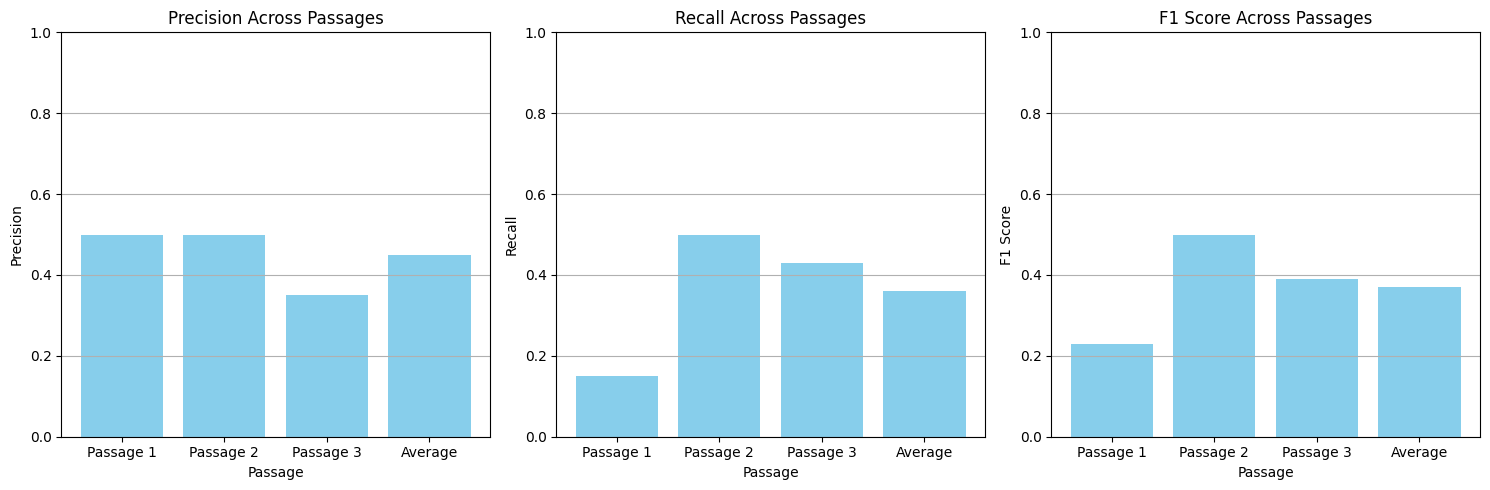

In [59]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Read the content of the book from houndOfBaskervilles.txt
with open("houndOfBaskervilles.txt", "r", encoding="utf-8") as file:
    book_content = file.read()

doc = nlp(book_content)

# Define entity types of interest
entity_types_of_interest = [
    "PERSON",
    "ORG",
    "LOC",
    "GPE",
    "FAC",
    "VEH",
]

# Extract entities and their types
entities = []
for ent in doc.ents:
    if ent.label_ in entity_types_of_interest:
        entities.append((ent.text, ent.label_))

# Sort entities by entity type
entities.sort(key=lambda x: x[1])

# # Passages from the book
# passages = [
#     "And now, having brought you up to date in the escaped convict, the Stapletons, Dr. Mortimer, and Frankland, of Lafter Hall, let me end on that which is most important and tell you more about the Barrymores, and especially about the surprising development of last night",
#     "Ah, you have a right to know about him. That is the cause of all the mischief, the wicked Hugo, who started the Hound of the Baskervilles. We’re not likely to forget him.",
#     "I guess we are aiding and abetting a felony, Watson? But, after what we have heard I don’t feel as if I could give the man up, so there is an end of it. All right, Barrymore, you can go."
# ]

# # Manually annotated entities
# manual_annotations = [
#     [("Stapletons", "PERSON"), ("Dr. Mortimer", "PERSON"), ("Frankland", "PERSON"), ("Lafter Hall", "FAC"), ("Barrymores", "PERSON")],
#     [("Hugo", "PERSON"), ("Baskervilles", "LOC"), ("Hound", "PERSON")],
#     [("Watson", "PERSON"), ("Barrymore", "PERSON")]
# ]


passages = [
 """They had gone a mile or two in a wagon when they passed one of the night shepherds upon the moorlands, and they cried to him to know if he had seen the hunt.  And the man, as the story goes, was so crazed with fear that he could scarce speak,
            but at last he said that he had indeed seen the unhappy
            maiden in the cart, with the hounds upon her track.  ‘But I have seen
            more than that,’ said he, ‘for Hugo Baskerville passed me
            upon his black mare, and there ran mute behind him such a
            hound of hell as God forbid should ever be at my heels.’
            So the drunken squires cursed the shepherd and rode onward.
             But soon their skins turned cold, for there came a
            galloping across the moor, and the black mare, dabbled with
            white froth, went past with trailing bridle and empty
            saddle.  Then the revellers rode close together, for a
            great fear was on them, but they still followed over the
            moor, though each, had he been alone, would have been right
            glad to have turned his horse’s head.  Riding slowly in
            this fashion they came at last upon the hounds.  These,
            though known for their valour and their breed, were
            whimpering in a cluster at the head of a deep dip or goyal,
            as we call it, upon the moor, some slinking away and some,
            with starting hackles and staring eyes, gazing down the
            narrow valley before them. The company had come to a halt, more sober men, as you may
            guess, than when they started.  The most of them would by
            no means advance, but three of them, the boldest, or it may
            be the most drunken, rode forward down the goyal. Now, it
            opened into a broad space in which stood two of those great
            stones, still to be seen there, which were set by certain
            forgotten peoples in the days of old. The moon was shining
            bright upon the clearing, and there in the centre lay the
            unhappy maid where she had fallen, dead of fear and of
            fatigue.  But it was not the sight of her body, nor yet was
            it that of the body of Hugo Baskerville lying near her,
            which raised the hair upon the heads of these three
            dare-devil roysterers, but it was that, standing over Hugo,
            and plucking at his throat, there stood a foul thing, a
            great, black beast, shaped like a hound, yet larger than
            any hound that ever mortal eye has rested upon.  And even
            as they looked the thing tore the throat out of Hugo
            Baskerville, on which, as it turned its blazing eyes and
            dripping jaws upon them, the three shrieked with fear and
            rode for dear life, still screaming, across the moor.  One,
            it is said, died that very night of what he had seen, and
            the other twain were but broken men for the rest of their
            days""",
	"""The train pulled up at a small wayside station and we all
      descended. Outside, beyond the low, white fence, a wagonette with
      a pair of cobs was waiting. Our coming was evidently a great
      event, for station-master and porters clustered round us to carry
      out our luggage. It was a sweet, simple country spot, but I was
      surprised to observe that by the gate there stood two soldierly
      men in dark uniforms who leaned upon their short rifles and
      glanced keenly at us as we passed. The coachman, a hard-faced,
      gnarled little fellow, saluted Sir Henry Baskerville, and in a
      few minutes we were flying swiftly down the broad, white road.
      Rolling pasture lands curved upward on either side of us, and old
      gabled houses peeped out from amid the thick green foliage, but
      behind the peaceful and sunlit countryside there rose ever, dark
      against the evening sky, the long, gloomy curve of the moor,
      broken by the jagged and sinister hills

      The wagonette swung round into a side road, and we curved upward
      through deep lanes worn by centuries of wheels, high banks on
      either side, heavy with dripping moss and fleshy hart’s-tongue
      ferns. Bronzing bracken and mottled bramble gleamed in the light
      of the sinking sun. Still steadily rising, we passed over a
      narrow granite bridge and skirted a noisy stream which gushed
      swiftly down, foaming and roaring amid the grey boulders. Both
      road and stream wound up through a valley dense with scrub oak
      and fir. At every turn Baskerville gave an exclamation of
      delight, looking eagerly about him and asking countless
      questions. To his eyes all seemed beautiful, but to me a tinge of
      melancholy lay upon the countryside, which bore so clearly the
      mark of the waning year. Yellow leaves carpeted the lanes and
      fluttered down upon us as we passed. The rattle of our wheels
      died away as we drove through drifts of rotting vegetation—sad
      gifts, as it seemed to me, for Nature to throw before the
      carriage of the returning heir of the Baskervilles""",
	"""The extract from my private diary which forms the last chapter
 has brought my narrative up to the eighteenth of October, a time
 when these strange events began to move swiftly towards their
 terrible conclusion. The incidents of the next few days are
 indelibly graven upon my recollection, and I can tell them
 without reference to the notes made at the time. I start them
 from the day which succeeded that upon which I had established
 two facts of great importance, the one that Mrs. Laura Lyons of
 Coombe Tracey had written to Sir Charles Baskerville and made an
 appointment with him at the very place and hour that he met his
 death, the other that the lurking man upon the moor was to be
 found among the stone huts upon the hillside. With these two
 facts in my possession I felt that either my intelligence or my
 courage must be deficient if I could not throw some further light
 upon these dark places.
 I had no opportunity to tell the baronet what I had learned about
 Mrs. Lyons upon the evening before, for Dr. Mortimer remained
 with him at cards until it was very late. At breakfast, however,
 I informed him about my discovery and asked him whether he would
 care to accompany me to Coombe Tracey. At first he was very eager
 to come, but on second thoughts it seemed to both of us that if I
 went alone the results might be better. The more formal we made
 the visit the less information we might obtain. I left Sir Henry
 behind, therefore, not without some prickings of conscience, and
 drove off upon my new quest.
 When I reached Coombe Tracey I told Perkins to put up the horses,
 and I made inquiries for the lady whom I had come to interrogate.
 I had no difficulty in finding her rooms, which were central and
 well appointed. A maid showed me in without ceremony, and as I
 entered the sitting-room a lady, who was sitting before a
 Remington typewriter, sprang up with a pleasant smile of welcome.
 Her face fell, however, when she saw that I was a stranger, and
 she sat down again and asked me the object of my visit."""]







manual_annotations = [
    [("Hugo", "PERSON"),("wagon","VEH"),
("squaries", "PERSON"),
 ("Maiden", "PERSON"),("cart","VEH"),("Baskerville","GPE"),
 ("Cold", "FAC"),("together","ORG"),("us","GPE"),
 ("Shepherd", "PERSON"),("kin","ORG"),
 ("Baskervilles", "LOC"),
 ("Horses", "VEH"),
   ("Mare", "VEH"),("hell","LOC"),("GOD","PERSON"),
     ("Company","ORG"),
("Heels","LOC"),
("goyal","PERSON"),
("moorlands", "LOC")],
    [("Henry Baskerville", "PERSON"),
 ("porters", "PERSON"),
 ("hill", "PERSON"),
 ("Baskervilles", "GPE"),
     ("us","GPE"),
("moor", "LOC"),
     ("kin","ORG"),
 ("wagonette", "VEH"),
("carriage", "VEH"),
   ("train", "VEH"),
 ],
  [("Henry", "PERSON"),
("laura", "PERSON"),
 ("Charles Baskerville", "PERSON"),
   ("Charles","PERSON"),
 ("Mortimer", "PERSON"),
 ("perkins", "PERSON"),
 ("moor", "LOC"),
   ("Lyons","PERSON"),
   ("Laura Lyons","PERSON"),
("coombe tracey", "LOC"),
("hunt", "LOC"),
("Room", "FAC"),
 ("horse", "VEH"),
   ("company", "ORG"),
 ]
]

model_entities = []

# Process the text using spaCy
passage_metrics = []

# Compare manual annotations with recognized entities for each passage
for i in range(len(manual_annotations)):
    manual_set = set(tuple(annotation) for annotation in manual_annotations[i])
    model_set = set(tuple(annotation) for annotation in entities if annotation[0] in passages[i])

    TP = len(manual_set.intersection(model_set))
    FP = len(model_set - manual_set)
    FN = len(manual_set - model_set)

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    passage_metrics.append({
        'Passage': f"Passage {i + 1}",
        'Precision': f"{precision:.2f}",
        'Recall': f"{recall:.2f}",
        'F1 Score': f"{f1_score:.2f}",
        'True Positives': TP,
        'False Positives': FP,
        'False Negatives': FN
    })

# Calculate average metrics
avg_precision = sum(float(metric['Precision']) for metric in passage_metrics) / len(passage_metrics)
avg_recall = sum(float(metric['Recall']) for metric in passage_metrics) / len(passage_metrics)
avg_f1_score = sum(float(metric['F1 Score']) for metric in passage_metrics) / len(passage_metrics)

# Add average metrics to passage metrics
passage_metrics.append({
    'Passage': 'Average',
    'Precision': f"{avg_precision:.2f}",
    'Recall': f"{avg_recall:.2f}",
    'F1 Score': f"{avg_f1_score:.2f}",
    'True Positives': '',
    'False Positives': '',
    'False Negatives': ''
})

# Display manual annotations, recognized entities, and metrics table
df_metrics = pd.DataFrame(passage_metrics)

# Create a table for TP, FP, FN
df_table = df_metrics[['Passage', 'True Positives', 'False Positives', 'False Negatives']].copy()
df_table.set_index('Passage', inplace=True)

print("Manual Annotations and Recognized Entities:")
entity_arr=[]
for i in range(len(manual_annotations)):
  # Initialize a dictionary to store entities and their types
  dic = {}
  for entity in entities:
      if entity[0] in passages[i]:
          if entity[0] in dic:
              if entity[1] not in dic[entity[0]]:
                  dic[entity[0]].append(entity[1])  # Use append to add the entity type to the list
          else:
              dic[entity[0]] = [entity[1]]  # Initialize a list for the entity and add its type
  entity_arr.append(dic)

for i, passage in enumerate(passages):
    print(f"Passage {i + 1}:")
    print("Manual Annotations:")
    print(tabulate(manual_annotations[i], headers=["Entity", "Entity Type"], tablefmt="pretty"))
    print("\nRecognized Entities:")

    # print(f"Entities for Passage {i}:")
    entities_list = []
    for entity, types in entity_arr[i].items():
        entities_list.append([entity, ', '.join(types)])

    print(tabulate(entities_list, headers=["Entity", "Entity Types"], tablefmt="pretty"))
    print("\n")


print("Metrics Table:")
print(df_table)

# Create a bar chart for precision, recall, and F1 score
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['Precision', 'Recall', 'F1 Score']

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(df_metrics['Passage'], df_metrics[metric].astype(float), color='skyblue')
    ax.set_title(f'{metric} Across Passages')
    ax.set_xlabel('Passage')
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1)
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [60]:

# Extract chapters
chapters = []

current_chapter = None
for token in doc:
    if token.text.startswith("Chapter"):
        if current_chapter:
            chapters.append(" ".join(current_chapter))
        current_chapter = []
    else:
        current_chapter.append(token.text)

# Print the parsed chapters
# for chapter in chapters:
    # print(chapter)


In [61]:
# Generate TF-IDF vectors for each chapter
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(chapters)

# Print the entire TF-IDF matrix
terms = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms, index=[f"Chapter {i+1}" for i in range(len(chapters))])

print("TF-IDF values for each chapter and term:")
print(tfidf_df)

TF-IDF values for each chapter and term:
                  10        11        12        13      13th       14  \
Chapter 1   0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
Chapter 2   0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
Chapter 3   0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
Chapter 4   0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
Chapter 5   0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
Chapter 6   0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
Chapter 7   0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
Chapter 8   0.000000  0.000000  0.000000  0.000000  0.010986  0.00000   
Chapter 9   0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
Chapter 10  0.008776  0.000000  0.000000  0.000000  0.000000  0.00000   
Chapter 11  0.000000  0.006826  0.000000  0.000000  0.000000  0.00000   
Chapter 12  0.000000  0.000000  0.006634  0.000000  0.000000  0.00000   
Chapter 13

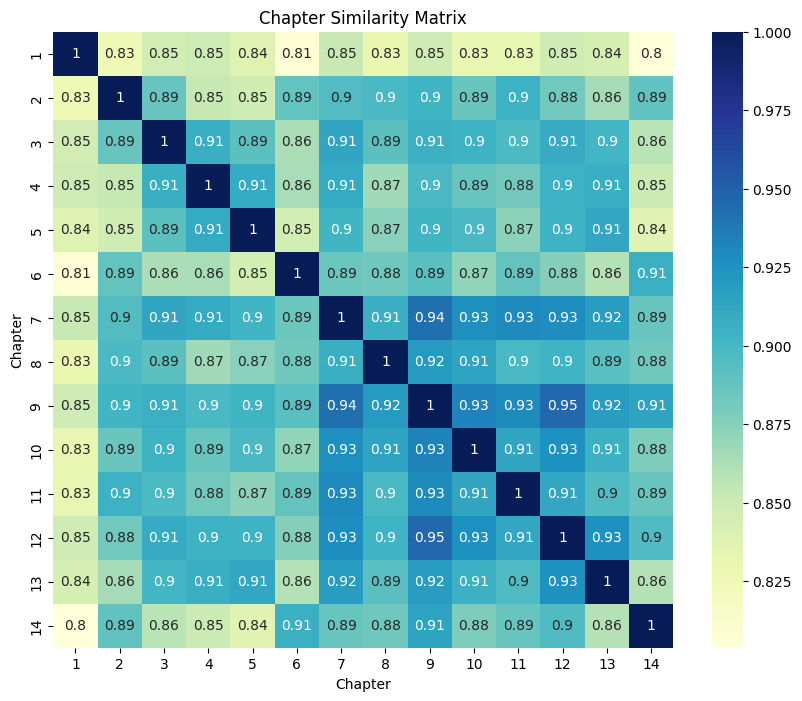

In [62]:
# Calculate cosine similarity between chapters
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Visualize the similarity matrix as a gradient table
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=range(1, len(chapters) + 1), yticklabels=range(1, len(chapters) + 1))
plt.title("Chapter Similarity Matrix")
plt.xlabel("Chapter")
plt.ylabel("Chapter")
plt.show()